In [1]:
import numpy as np
import matplotlib.pyplot as plt
# from tqdm import tqdm
%matplotlib inline

# Problem 1

In [2]:
def newton(f, Df, x0, epsilon, max_iter, h=None):
    '''Approximate solution of f(x)=0 by Newton's method.
    
    Parameters
    -----------
    f : function
        Function for which we are searching for a solutoin f(x)=0.
    Df : function
        Derivative of f(x).
    x0 : number
        Initial guess for a solution f(x)=0.
    epsilon : number 
        Stopping criteria is abs(f(x)) < epsilon. 
    max_iter : integer
        Maximum number of iterations of Newton's method.
    h : stepsize
    Returns
    -------------
    xn : number
        Implement Newton's method: compute the linear approximation
        of f(x) at xn and find x intercept by the formula
            x = xn -f(xn)/Df(xn)
        Continue until abs(f(xn)) < epsilon and return xn.
        If Df(xn) == 0, return None. If the number of iterations
        exceeds max_iter, then return None.
    ---------
    '''
    xn = x0
    if h is None:
        for n in range(0, max_iter):
            fxn = f(xn)
            if abs(fxn) < epsilon:
                # print("Found solution after", n, "iterations.")
                return xn
            Dfxn = Df(xn)
            if Dfxn == 0:
                # print("Zero derivative. No solution found.")
                return None
            
            xn -= fxn/Dfxn
        # print("Exceed maximum iterations. No solution found.")
        return None

    else:
        h = h
        for n in range(0, max_iter):
            fxn = f(xn, h)
            if abs(fxn) < epsilon:
                # print("Found solution after", n, "iterations.")
                return xn
            Dfxn = Df(xn, h)
            if Dfxn == 0:
                # print("Zero derivative. No solution found.")
                return None
            
            xn -= fxn/Dfxn
        # print("Exceed maximum iterations. No solution found.")
        return None



1a) Implement the Trapezoid method and then compare the results from the Forward Euler, Backward Euler, and Trapezoid Method for the test problem
$$
\frac{dy}{dt} = \lambda y, ~ y(0) = 1, ~ 0\leq t \leq 1.
$$
Develop test cases for $\lambda < 0$ and $\lambda >0$.  Using the exact solution described above, determine the order of error of each method.  Describe the behavior of the solutions and their accuracy as you vary $\delta t$ in the different methods.  Note, for this problem, we see that we do not need a root finder for the implicit schemes since 

Backward Euler: $y_{n+1} = y_{n}+\delta t \lambda y_{n+1}$ so $y_{n+1} = \frac{y_{n}}{1-\lambda \delta t} = \left(\frac{1}{1-\lambda \delta t} \right)^{n+1}y_{0}$

Trapezoid: $y_{n+1} = y_{n}+\frac{\lambda\delta t}{2} \left(y_{n+1}+y_{n}\right)$ so $y_{n+1} = \frac{1+\lambda \delta t/2}{1-\lambda \delta t/2}y_{n} = \left(\frac{1+\lambda \delta t/2}{1-\lambda \delta t/2} \right)^{n+1}y_{0}$.

In [3]:
t0 = 0.
tf = 1.
y0 = 1.
lamb = -10

dt = 0.2
myf = lambda y, t, lamb: y0*np.exp(lamb*t)
de = lambda y, t, lamb: lamb*y
exact = lambda t,lamb : np.exp(lamb * t)

In [4]:
def backward_solver(f,dt,t0,tf,y0, lamb=None, df=None):
    '''
    f = numerical problem
    dt = stepsize
    t0 = initial
    tf = terminal
    y0 = initial value
    lamb = Problem 1a)
    df = For newton
    '''
    nsteps = int(np.round((tf-t0)/dt))
    ysol = np.zeros(nsteps+1)
    times = np.linspace(t0, tf, nsteps+1)
    ysol[0] = y0
    
    if lamb is not None and df is None:
        for jj in range(1,nsteps+1):
            ysol[jj] = y0 * (1/(1-lamb*dt))**(jj) 

    else:
        for jj in range(1, nsteps+1):
            u = lambda x: x - ysol[jj-1] -dt* f(x, times[jj])
            up = lambda x: 1 - dt*df(x, times[jj])
            y_n1 = newton(u, up, ysol[jj-1]+1e-3, 1e-11, 1000)
            ysol[jj] = y_n1

    return np.array([times,ysol])

In [5]:
def forward_solver(f,dt,t0,tf,y0, lamb=None):
    nsteps = int(np.round((tf-t0)/dt))
    ysol = np.zeros(nsteps+1)
    times = np.zeros(nsteps+1)
    ysol[0] = y0
    times[0] = t0
    if lamb is not None:
        for jj in range(1,nsteps+1):
            ysol[jj] = ysol[jj-1] + dt*f(ysol[jj-1], times[jj-1], lamb)
            times[jj] = times[jj-1] + dt

    else:
        for jj in range(1,nsteps+1):
            ysol[jj] = ysol[jj-1] + dt*f(ysol[jj-1], times[jj-1])
            times[jj] = times[jj-1] + dt
    return np.array([times,ysol])


In [6]:
def trapezoid_solver(f, dt, t0, tf, y0, lamb, df=None):
    '''
    f = numerical problem
    dt = stepsize
    t0 = initial
    tf = terminal
    y0 = initial value
    lamb = Problem 1a)
    df = For newton
    '''
    nsteps = int(np.round((tf-t0)/dt))
    ysol = np.zeros(nsteps+1)
    times = np.linspace(t0, tf, nsteps+1)
    ysol[0] = y0
    
    if lamb is not None and df is None:
        for jj in range(1,nsteps+1):
            ysol[jj] = y0 * ((1+lamb*dt/2)/(1-lamb*dt/2))**(jj) 

    else:
        for jj in range(1, nsteps+1):
            u = lambda x: x - ysol[jj-1] -0.5*dt*(f(ysol[jj-1], times[jj-1]) + f(x, times[jj]))
            up = lambda x: 1 - 0.5*dt*df(x, times[jj])
            y_n1 = newton(u, up, ysol[jj-1]+1e-3, 1e-11, 1000)
            ysol[jj] = y_n1

    return np.array([times,ysol])

In [8]:
forward = forward_solver(de, dt, t0, tf, y0, lamb=lamb)
grid = forward[0]
backward = backward_solver(de, dt, t0, tf, y0, lamb=lamb)
trapezoid = trapezoid_solver(de, dt, t0, tf, y0, lamb=lamb)

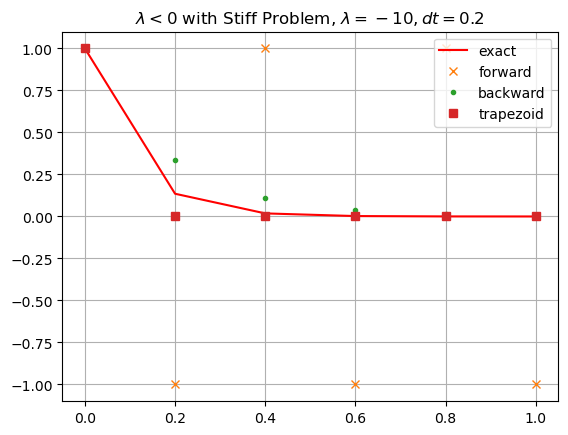

In [10]:
plt.plot(grid, exact(grid, lamb), "r", label="exact")
plt.plot(grid, forward[1], "C1x", label = "forward")
plt.plot(backward[0], backward[1], "C2.", label = "backward")
plt.plot(grid, trapezoid[1], "C3s", label = "trapezoid")
plt.title(f"$\lambda < 0$ with Stiff Problem, $\lambda = {lamb}, dt = {dt}$")
plt.grid(True)
plt.savefig("stiff problem.png")
plt.legend()
plt.show()

In [11]:
t0 = 0.
tf = 1.
y0 = 1.
lamb = -10

dt = 0.05
myf = lambda y, t, lamb: y0*np.exp(lamb*t)
de = lambda y, t, lamb: lamb*y

In [12]:
forward = forward_solver(de, dt, t0, tf, y0, lamb=lamb)
grid = forward[0]
backward = backward_solver(de, dt, t0, tf, y0, lamb=lamb)
trapezoid = trapezoid_solver(de, dt, t0, tf, y0, lamb=lamb)

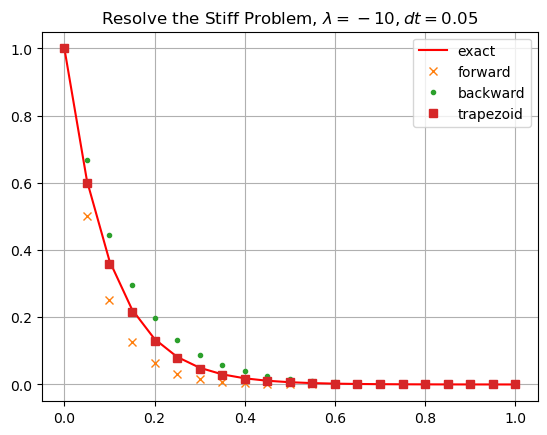

In [13]:
plt.plot(grid, myf(_,grid, lamb), "r", label="exact")
plt.plot(grid, forward[1], "C1x", label = "forward")
plt.plot(backward[0], backward[1], "C2.", label = "backward")
plt.plot(grid, trapezoid[1], "C3s", label = "trapezoid")
plt.title(f"Resolve the Stiff Problem, $\lambda = {lamb}, dt = {dt}$")
plt.legend()
plt.grid()
plt.savefig("non-stiff problem.png")
plt.show()

In [14]:
lamb = 3
dt = 0.1

In [15]:
forward = forward_solver(de, dt, t0, tf, y0, lamb=lamb)
grid = forward[0]
backward = backward_solver(de, dt, t0, tf, y0, lamb=lamb)
trapezoid = trapezoid_solver(de, dt, t0, tf, y0, lamb=lamb)

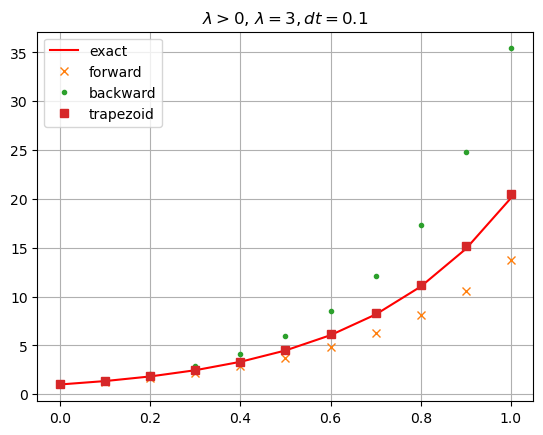

In [16]:
plt.plot(grid, myf(_,grid, lamb), "r", label="exact")
plt.plot(grid, forward[1], "C1x", label = "forward")
plt.plot(backward[0], backward[1], "C2.", label = "backward")
plt.plot(grid, trapezoid[1], "C3s", label = "trapezoid")
plt.title(f"$\lambda > 0$, $\lambda = {lamb}, dt = {dt}$")
plt.legend()
plt.grid()
plt.savefig("Positive lambda.png")
plt.show()

In [17]:
# f = lambda t,y: y
# y0 = 1;
h = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
E = np.zeros(len(h))

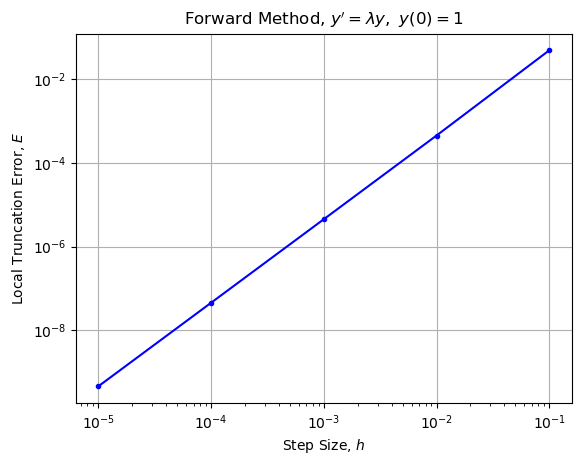

2.0401755572928897
2.0039194135445526
2.0003909724447984
2.0000391088289318


In [18]:
for i,n in enumerate(h):
    # print(i)|
    forward = forward_solver(de, n, t0, tf, y0, lamb)

    # y = odeEuler(f,[0,h[n]],y0)
    y = forward[1][1]
    y1_exact = exact(n, lamb)
    E[i] = np.abs(y1_exact - y)
    
plt.loglog(h,E,'b.-'), plt.grid(True)
plt.title(f"Forward Method, $y'=\lambda y,~y(0)=1$")

plt.xlabel("Step Size, $h$"), plt.ylabel("Local Truncation Error, $E$")
plt.savefig("forward error problem1a.png")
plt.show()


for j in range(len(h)-1):
    print((np.log(E[j+1]) - np.log(E[j])) / (np.log(h[j+1]) - np.log(h[j])))

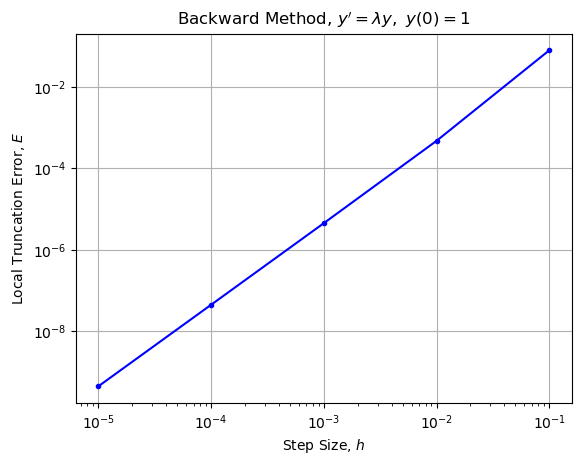

2.220906861893428
2.0197514590244094
2.001956371746284
2.000195488272896


In [19]:
for i,n in enumerate(h):
    # print(i)|
    forward = backward_solver(de, n, t0, tf, y0, lamb)

    # y = odeEuler(f,[0,h[n]],y0)
    y = forward[1][1]
    y1_exact = exact(n, lamb)
    E[i] = np.abs(y1_exact - y)
    
plt.loglog(h,E,'b.-'), plt.grid(True)
plt.title(f"Backward Method, $y'=\lambda y,~y(0)=1$")
plt.xlabel("Step Size, $h$"), plt.ylabel("Local Truncation Error, $E$")
plt.savefig("backward error problem 1a.png")
plt.show()

for j in range(len(h)-1):
    print((np.log(E[j+1]) - np.log(E[j])) / (np.log(h[j+1]) - np.log(h[j])))

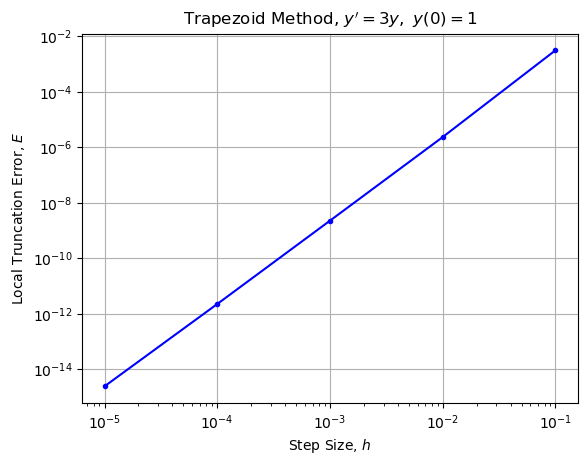

3.123614136991228
3.0117844810404977
3.0011363233887955
2.9645167613363337


In [20]:
for i,n in enumerate(h):
    # print(i)|
    forward = trapezoid_solver(de, n, t0, tf, y0, lamb)

    # y = odeEuler(f,[0,h[n]],y0)
    y = forward[1][1]
    y1_exact = exact(n, lamb)
    E[i] = np.abs(y1_exact - y)
    
plt.loglog(h,E,'b.-'), plt.grid(True)
plt.title(f"Trapezoid Method, $y'={lamb}y,~y(0)=1$")
plt.xlabel("Step Size, $h$"), plt.ylabel("Local Truncation Error, $E$")
plt.savefig("Trapez error problem1a.png")
plt.show()

for j in range(len(h)-1):
    print((np.log(E[j+1]) - np.log(E[j])) / (np.log(h[j+1]) - np.log(h[j])))

**Problem 1**: 10pts
1b) For the differential equation 
$$
\frac{dy}{dt} = \cos(y), ~ y(0) = 10, ~ 0\leq t \leq 10,
$$
find an exact solution using the fact that the problem is seperable. Then solve it using the Trapezoid Method.  Again, determine the order of error of the method and comment on how the numerical solution changes with step size $\delta t$. 


In [21]:
t0 = 0
tf = 10
y0 = 10

tlist = np.array([1e-1, 0.5*1e-1, 1e-2, 0.5*1e-2, 1e-3, 0.5*1e-3, 1e-4, 0.5*1e-4])

# tlist = [1e-1,0.5*1e-1, 1e-2, 0.5*1e-2, 0.7*1e-2, 1e-4]
# tlist = [1e-4, 1e-5]

stylelist = ['C1.', "C2x", "C3s", "C4*", "C8p", "C9", "C10", "C5", "C6"]

In [22]:
solval = np.zeros_like(tlist)

In [23]:
f = lambda y,t: np.cos(y)
df = lambda y,t: -np.sin(y)

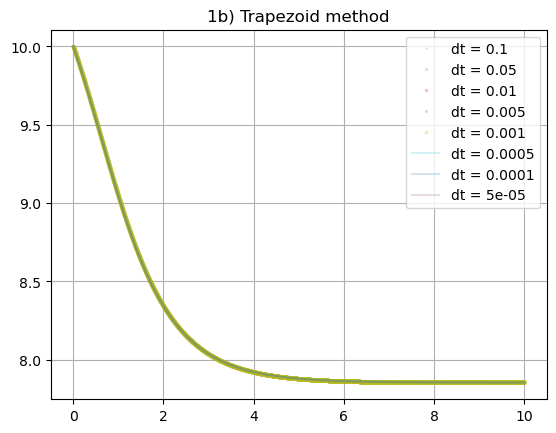

In [24]:
for t, style in zip(tlist, stylelist):
    trapezoid = trapezoid_solver(f, t, t0, tf, y0, lamb=None, df=df)
    time = trapezoid[0]
    numeric = trapezoid[1]
    # if t != tlist[-2] or tlist[-1]:
    #     plt.plot(time, numeric, style, label=f"dt = {t}", lw=10)
        # break
    # else:
    solval[np.where(tlist==t)] = trapezoid[1][1]
    plt.plot(time, numeric, style, label=f"dt = {t}", markersize=2, alpha=0.2)    

plt.legend()
plt.grid()
plt.title("1b) Trapezoid method")
plt.savefig("1b) trapezoid method.png")
plt.show()

In [25]:
approx_f = lambda y, h : -(np.sin(y) + 1)/np.cos(y) + np.exp(h)*(np.sin(10) + 1)/np.cos(10)
approx_df = lambda y,h : -(np.sin(y) + 1)/(np.cos(y)**2)

In [26]:
sollist = np.zeros_like(tlist)
for i,t in enumerate(tlist):
    # print(i)
    sollist[i] = newton(approx_f, approx_df, 10, 1.0e-15, 100000, h=t)


In [27]:
solerror = np.abs(sollist - solval)


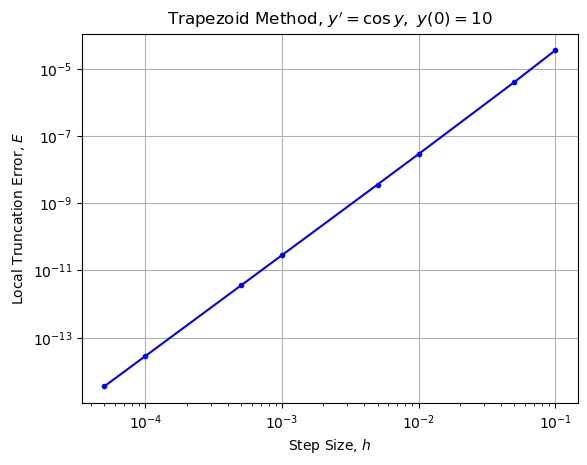

3.1523241250450966
3.056999838497541
3.0172296531463374
3.00599311342667
3.0012549072287045
3.0034079787658747
2.9999999999999973


In [28]:
plt.loglog(tlist, solerror,'b.-'), plt.grid(True)
plt.title("Trapezoid Method, $y'=\cos{y},~y(0)=10$")
plt.xlabel("Step Size, $h$"), plt.ylabel("Local Truncation Error, $E$")
plt.savefig("trapezoid accuracy 2")
plt.show()

for j in range(len(tlist)-1):
    print((np.log(solerror[j+1]) - np.log(solerror[j])) / (np.log(tlist[j+1]) - np.log(tlist[j])))

1c) For the differential equation
$$
\frac{dy}{dt} = \cos(ty), ~ y(0) = 10, ~ 0\leq t \leq 10,
$$
solve it using the Trapezoid method.  How does your solution compare in behavior to that you found in $2b$?  Explore several choices of step size $\delta t$ and determine the relative strengths and weaknesses of all three different approaches. In particular, which method allows for the largest time step $\delta t$ such that you get believable results?

In [29]:
t0 = 0
tf = 10
y0 = 10

f = lambda y,t: np.cos(t*y)
df = lambda y,t: -t*np.sin(t*y)
numerical_sol = {}

In [30]:
tlist = [1e-1 ,1e-2, 1e-3, 1e-4, 1e-5]
stylelist = ['C1.', "C2x", "C3s", "C4*", "C5p"]
methodlist = ["Forward", "Backward", "Trapezoid"]

In [31]:
for t, style in zip(tlist, stylelist):
    trapezoid = trapezoid_solver(f, t, t0, tf, y0, lamb=None, df=df)
    time = trapezoid[0]
    numeric = trapezoid[1]
    numerical_sol[f"Trapezoid {t}"] = numeric
    numerical_sol[f"time {t}"] = time
    

In [32]:
for t, style in zip(tlist, stylelist):
    backward = backward_solver(f, t, t0, tf, y0,df = df)
    time = backward[0]
    numeric = backward[1]
    numerical_sol[f"Backward {t}"] = numeric
    numerical_sol[f"time {t}"] = time


In [33]:
for t, style in zip(tlist, stylelist):
    forward = forward_solver(f, t, t0, tf, y0)
    time = forward[0]
    numeric = forward[1]
    numerical_sol[f"Forward {t}"] = numeric

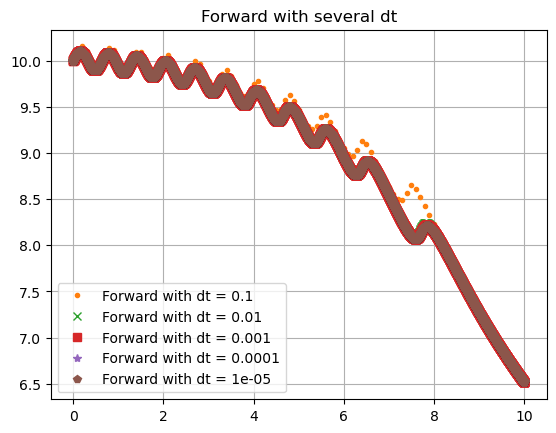

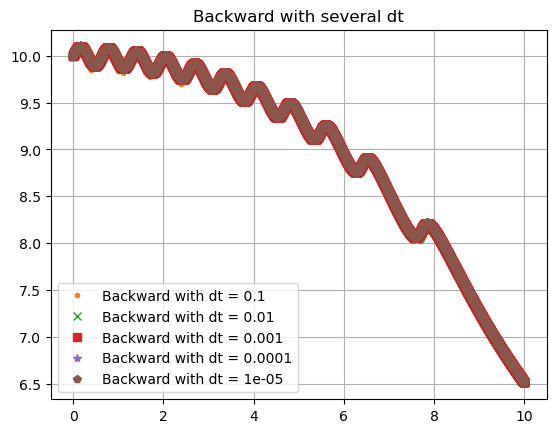

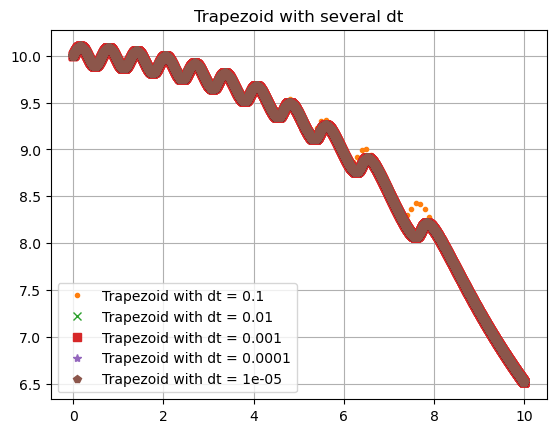

In [34]:
for method in methodlist:
    for t, style in zip(tlist, stylelist):
        plt.plot(numerical_sol[f"time {t}"],numerical_sol[f"{method} {t}"],\
             style, label = f"{method} with dt = {t}")
        # if t == tlist[2]:
        #     # plt.legend()

    plt.grid()
    plt.title(f"{method} with several dt")
    plt.legend()
    plt.savefig(f"{method}.png")
    plt.show()


# plt.plot()


# Problem 2

In [35]:
def euler_solver(dydt, u0, t, args=()):
    """
    dydt:   callable (ndarray, float) -> ndarray
    u0:     ndarray (N,)
    t:      ndarray (M,)
    ---
    returns ndarray (M, N)
    """
    t = np.asarray(t)
    u0 = np.asarray(u0)
    # Prepare grid
    grid = np.zeros((len(t), len(u0)))
    grid[0] = u0
    # Solve with grid
    for i in range(1, len(t)):
        h = t[i] - t[i - 1]
        f = np.asarray(dydt(grid[i - 1], t[i], *args))
        grid[i] = grid[i - 1] + h * f
    return grid

In [36]:
def rk4_solver(dydt, u0, t, args=()):
    """
    dydt:   callable (ndarray, float) -> ndarray
    u0:     ndarray (N,)
    t:      ndarray (M,)
    ---
    returns ndarray (M, N)
    """
    t = np.asarray(t)
    u0 = np.asarray(u0)
    # Prepare grid
    grid = np.zeros((len(t), len(u0)))
    grid[0] = u0
    # Solve with grid
    for i in range(1, len(t)):
        h = t[i] - t[i - 1]
        f0 = grid[i - 1]
        f1 = np.asarray(dydt(f0, t[i], *args))
        f2 = np.asarray(dydt(f0 + 0.5*h*f1, t[i]+0.5*h, *args))
        f3 = np.asarray(dydt(f0 + 0.5*h*f2, t[i]+0.5*h, *args))
        f4 = np.asarray(dydt(f0 + h*f3, t[i]+h, *args))
        grid[i] = grid[i - 1] + (1/6) * h * (f1 + f4 + 2 * (f2 + f3))
    return grid

In [37]:
def van_der_pol(mu, u0, t, method='euler'):

    def func(u0, t, mu):
        x, y = u0
        dydt = [y, mu*(1-x**2)*y - x]
        return dydt

    if method == 'euler':
        solver = euler_solver
    elif method == 'rk4':
        solver = rk4_solver
    else:
        raise RuntimeError("Not valid solver name")

    # sol = odeint(func, u0, t)
    sol = solver(func, u0, t, args=(mu,))
    return sol

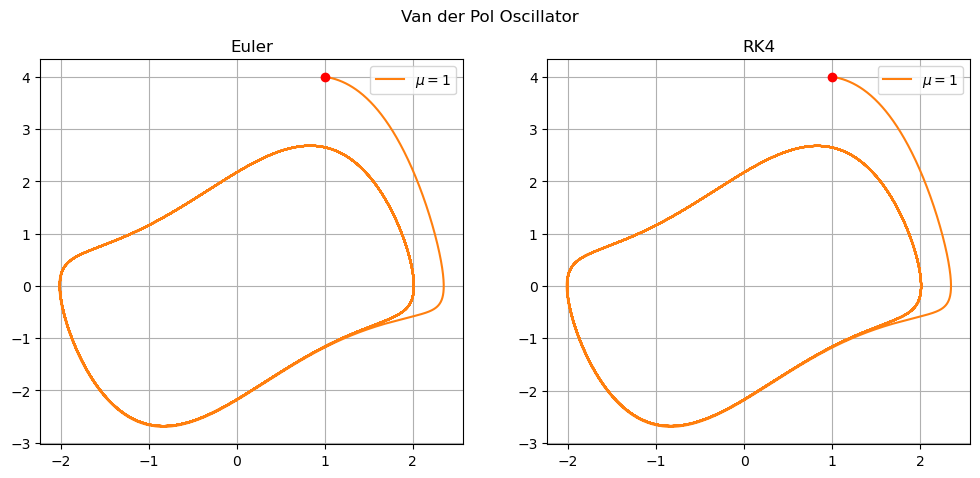

In [38]:
t = np.linspace(0, 100, 50000)
u0 = [1, 4] 
mus = [1]
styles = ["C1", "C2", "C3", "C4"]

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
methods = ['Euler', 'RK4']

for mu, style in zip(mus, styles):
    for i, m in enumerate(methods):
        sol = van_der_pol(mu, u0, t, method=m.lower())
        axes[i].plot(sol[:, 0], sol[:, 1], c=style, label=f"$\mu = {mu}$")

for i, m in enumerate(methods):
    axes[i].set_title(m)
    axes[i].grid()
    axes[i].legend()
    axes[i].plot(u0[0], u0[1], 'ro')
fig.suptitle("Van der Pol Oscillator")
# plt.savefig("Van der Pol Oscillator mu=1.png")
plt.show(fig)

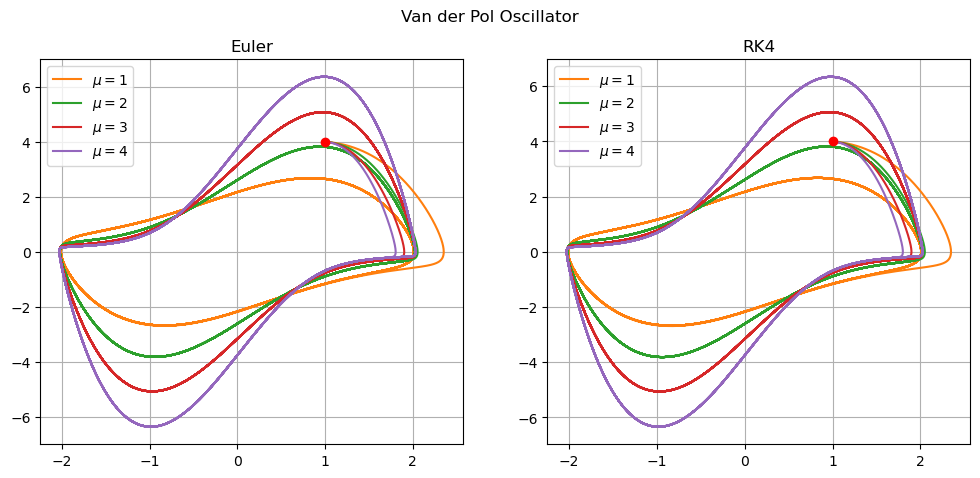

In [39]:
t = np.linspace(0, 100, 50000)
u0 = [1, 4] 
mus = [1, 2, 3, 4]
styles = ["C1", "C2", "C3", "C4"]

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
methods = ['Euler', 'RK4']

for mu, style in zip(mus, styles):
    for i, m in enumerate(methods):
        sol = van_der_pol(mu, u0, t, method=m.lower())
        axes[i].plot(sol[:, 0], sol[:, 1], c=style, label=f"$\mu = {mu}$")

for i, m in enumerate(methods):
    axes[i].set_title(m)
    axes[i].grid()
    axes[i].legend()
    axes[i].plot(u0[0], u0[1], 'ro')
fig.suptitle("Van der Pol Oscillator")
# plt.savefig("Van der Pol Oscillator.png")
plt.show(fig)